In [0]:
from scipy.integrate import quad
import numpy as np
import math 
import matplotlib.pyplot as plt

In [0]:
def declination(w):       
    ab = abs(w-182.5)
    dec = 0.41 - ((0.41*ab)/91.25)
    return dec  

In [0]:
def f(t):
    constraint = np.sin(t)+a*np.tan(declination(w))
    if (constraint > 0):
        return np.cos(declination(w))*(np.sin(t)+a*np.tan(declination(w)))
    else:
        return 0

In [0]:
results=dict()
de=dict()
p=np.pi * 40.7 / 180
a=-0.8
while (a<0.9):
  area=math.sqrt(1+a*a)
  sum=0.0
  for w in range (0,365):    
    results[(a,w)]=quad(f, np.arcsin(-np.tan(p)*np.tan(declination(w))), np.pi-(np.arcsin(-np.tan (p) * np.tan (declination(w)))))[0]
    de[(a,w)]=results[(a,w)]/area
    sum = sum + de[(a,w)]
  print (a,sum)
  a= a+ 0.4
  
  


-0.8 541.943886061967
-0.4 646.4579200042906
0.0 701.8521171352407
0.4 659.9460028164656
0.8 564.6308696722207


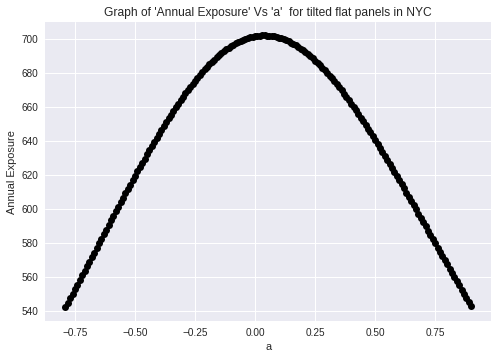

In [0]:

plt.title("Graph of 'Annual Exposure' Vs 'a'  for tilted flat panels in NYC")
a=-0.8
p=np.pi * 40.7 / 180
while (a<0.9):
  area=math.sqrt(1+a*a)
  sum=0.0
  for w in range (0,365):
    results[(a,w)]=quad(f, np.arcsin(-np.tan(p)*np.tan(declination(w))),np.pi-(np.arcsin(-np.tan (p) * np.tan (declination(w)))))[0]
    de[(a,w)]=results[(a,w)]/area
    sum = sum + de[(a,w)]
  a=a+0.01
  plt.plot(a, sum, color="black", markeredgecolor="blue", marker='o')
plt.ylabel('Annual Exposure')
plt.xlabel('a')
plt.show()
